In [1]:
import pandas as pd
import numpy as np

In [4]:
response=pd.read_csv('Retail_Data_Response.csv')
transaction = pd.read_csv('Retail_Data_Transactions.csv')

In [6]:
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [7]:
transaction

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [8]:
response.describe()

,response
count,6884.000000
mean,0.093986
std,0.291831
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
response.isna().sum()

customer_id    0
response       0
dtype: int64

In [11]:
transaction.describe()

,tran_amount
count,125000.000000
mean,64.991912
std,22.860006
min,10.000000
25%,47.000000
50%,65.000000
75%,83.000000
max,105.000000


In [16]:
transaction.isna().sum()

customer_id    0
trans_date     0
tran_amount    0
dtype: int64

# so it is clear that there is no null value in dataset

# Changing datatypes

In [17]:
transaction.columns

Index(['customer_id', 'trans_date', 'tran_amount'], dtype='object')

In [22]:
response.columns

Index(['customer_id', 'response'], dtype='object')

In [23]:
transaction.dtypes

customer_id    object
trans_date     object
tran_amount     int64
dtype: object

In [52]:
transaction['tran_amount'] = transaction['tran_amount'].astype(int)
transaction['tran_date'] = pd.to_datetime(transaction['trans_date'])

C:\Users\shiva\AppData\Local\Temp\ipykernel_11964\2356819349.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  transaction['tran_date'] = pd.to_datetime(transaction['trans_date'])


In [31]:
response.dtypes

customer_id    object
response        int64
dtype: object

In [32]:
response['response']=response['response'].astype(int)
set(response['response'])

{0, 1}

# Merging into common dataframe df 

In [35]:
df=pd.merge(transaction,response, how='left', on='customer_id')
df

,customer_id,trans_date,tran_amount,tran_date,response
0,CS5295,11-Feb-13,35,2013-02-11,1.0
1,CS4768,15-Mar-15,39,2015-03-15,1.0
2,CS2122,26-Feb-13,52,2013-02-26,0.0
3,CS1217,16-Nov-11,99,2011-11-16,0.0
4,CS1850,20-Nov-13,78,2013-11-20,0.0
...,...,...,...,...,...
124995,CS8433,26-Jun-11,64,2011-06-26,0.0
124996,CS7232,19-Aug-14,38,2014-08-19,0.0
124997,CS8731,28-Nov-14,42,2014-11-28,0.0
124998,CS8133,14-Dec-13,13,2013-12-14,0.0


In [37]:
df.describe()

,tran_amount,tran_date,response
count,125000.000000,125000,124969.000000
mean,64.991912,2013-04-13 12:01:16.031999744,0.110763
min,10.000000,2011-05-16 00:00:00,0.000000
25%,47.000000,2012-04-29 00:00:00,0.000000
50%,65.000000,2013-04-14 00:00:00,0.000000
75%,83.000000,2014-03-28 00:00:00,0.000000
max,105.000000,2015-03-16 00:00:00,1.000000
std,22.860006,NaN,0.313840


In [38]:
df.isna().sum()

customer_id     0
trans_date      0
tran_amount     0
tran_date       0
response       31
dtype: int64

In [39]:
#since there are few outliers we an simply remove them
df.dropna()

,customer_id,trans_date,tran_amount,tran_date,response
0,CS5295,11-Feb-13,35,2013-02-11,1.0
1,CS4768,15-Mar-15,39,2015-03-15,1.0
2,CS2122,26-Feb-13,52,2013-02-26,0.0
3,CS1217,16-Nov-11,99,2011-11-16,0.0
4,CS1850,20-Nov-13,78,2013-11-20,0.0
...,...,...,...,...,...
124995,CS8433,26-Jun-11,64,2011-06-26,0.0
124996,CS7232,19-Aug-14,38,2014-08-19,0.0
124997,CS8731,28-Nov-14,42,2014-11-28,0.0
124998,CS8133,14-Dec-13,13,2013-12-14,0.0


# Checking for outliers

In [41]:
#calculating z_scores
z_score = (df['tran_amount']-df['tran_amount'].mean())/df['tran_amount'].std()
z_score

0        -1.311982
1        -1.137004
2        -0.568325
3         1.487667
4         0.569033
            ...   
124995   -0.043391
124996   -1.180748
124997   -1.005770
124998   -2.274361
124999   -1.268237
Name: tran_amount, Length: 125000, dtype: float64

In [42]:
threshold=3
outliers = df[abs(z_score)>threshold]
if outliers.empty:
    print("no outliers")
else:
    print(outliers)

no outliers


In [44]:
#using iqr method
#calculate 1st quantile and 3rd quantile
Q1 = df['tran_amount'].quantile(0.25)
Q3 = df['tran_amount'].quantile(0.75)

#now we do iqr
IQR = Q3-Q1

#now we calculate threshold

lower_threshold = Q1 - 1.5*IQR
upper_threshold = Q3 + 1.5*IQR

outliers = df[(df['tran_amount']<lower_threshold) | (df['tran_amount']>upper_threshold)]
if outliers.empty:
    print("no outliers")
else:
    print(outliers)

no outliers


<Axes: >

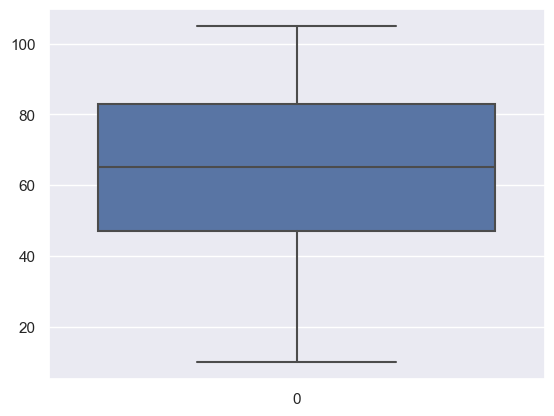

In [83]:
import seaborn as sns
sns.boxplot(transaction['tran_amount'])

# there are no outliers in data

# Data prepration

In [55]:
df.dtypes

customer_id            object
trans_date             object
tran_amount             int32
tran_date      datetime64[ns]
response              float64
dtype: object

In [56]:
df['trans_date'] = pd.to_datetime(df['trans_date'])

C:\Users\shiva\AppData\Local\Temp\ipykernel_11964\1193251776.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date'] = pd.to_datetime(df['trans_date'])


In [57]:
df['month'] = df['trans_date'].dt.month
df

,customer_id,trans_date,tran_amount,tran_date,response,month
0,CS5295,2013-02-11,35,2013-02-11,1.0,2
1,CS4768,2015-03-15,39,2015-03-15,1.0,3
2,CS2122,2013-02-26,52,2013-02-26,0.0,2
3,CS1217,2011-11-16,99,2011-11-16,0.0,11
4,CS1850,2013-11-20,78,2013-11-20,0.0,11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,2011-06-26,0.0,6
124996,CS7232,2014-08-19,38,2014-08-19,0.0,8
124997,CS8731,2014-11-28,42,2014-11-28,0.0,11
124998,CS8133,2013-12-14,13,2013-12-14,0.0,12


In [65]:
df['year'] = df['trans_date'].dt.year
df

,customer_id,trans_date,tran_amount,tran_date,response,month,year
0,CS5295,2013-02-11,35,2013-02-11,1.0,2,2013
1,CS4768,2015-03-15,39,2015-03-15,1.0,3,2015
2,CS2122,2013-02-26,52,2013-02-26,0.0,2,2013
3,CS1217,2011-11-16,99,2011-11-16,0.0,11,2011
4,CS1850,2013-11-20,78,2013-11-20,0.0,11,2013
...,...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,2011-06-26,0.0,6,2011
124996,CS7232,2014-08-19,38,2014-08-19,0.0,8,2014
124997,CS8731,2014-11-28,42,2014-11-28,0.0,11,2014
124998,CS8133,2013-12-14,13,2013-12-14,0.0,12,2013


In [66]:
df['day'] = df['trans_date'].dt.day
df

,customer_id,trans_date,tran_amount,tran_date,response,month,year,day
0,CS5295,2013-02-11,35,2013-02-11,1.0,2,2013,11
1,CS4768,2015-03-15,39,2015-03-15,1.0,3,2015,15
2,CS2122,2013-02-26,52,2013-02-26,0.0,2,2013,26
3,CS1217,2011-11-16,99,2011-11-16,0.0,11,2011,16
4,CS1850,2013-11-20,78,2013-11-20,0.0,11,2013,20
...,...,...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,2011-06-26,0.0,6,2011,26
124996,CS7232,2014-08-19,38,2014-08-19,0.0,8,2014,19
124997,CS8731,2014-11-28,42,2014-11-28,0.0,11,2014,28
124998,CS8133,2013-12-14,13,2013-12-14,0.0,12,2013,14


In [61]:
monthly_sales = df.groupby('month')['tran_amount'].sum()
monthly_sales=monthly_sales.sort_values(ascending=False).reset_index()
monthly_sales.head()

,month,tran_amount
0,8,726921
1,10,725320
2,1,724107
3,7,717223
4,12,709964


In [125]:
yearly_sales = df.groupby('year')['tran_amount'].sum()
yearly_sales = yearly_sales.sort_values(ascending=False).reset_index()
yearly_sales

,year,tran_amount
0,2013,2137368
1,2012,2116599
2,2014,2094508
3,2011,1340339
4,2015,435175


In [126]:
cust_sales = df.groupby('customer_id')['tran_amount'].sum()
cust_sales=cust_sales.sort_values(ascending=False).reset_index()
cust_sales.head()


,customer_id,tran_amount
0,CS4424,2933
1,CS4320,2647
2,CS5752,2612
3,CS4660,2527
4,CS3799,2513


# Visualizations

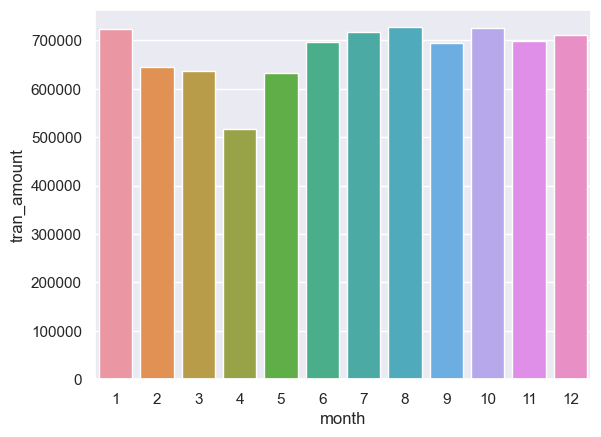

In [89]:
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
sns.barplot(x='month',y='tran_amount',data=monthly_sales)
plt.show()

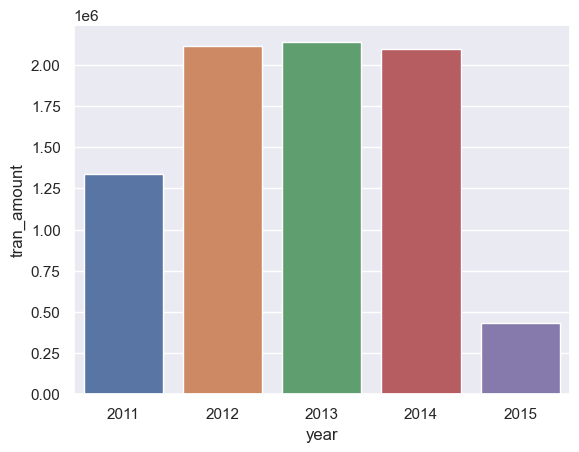

In [92]:
sns.set(style='darkgrid')
sns.barplot(x='year',y='tran_amount',data=yearly_sales)
plt.show()

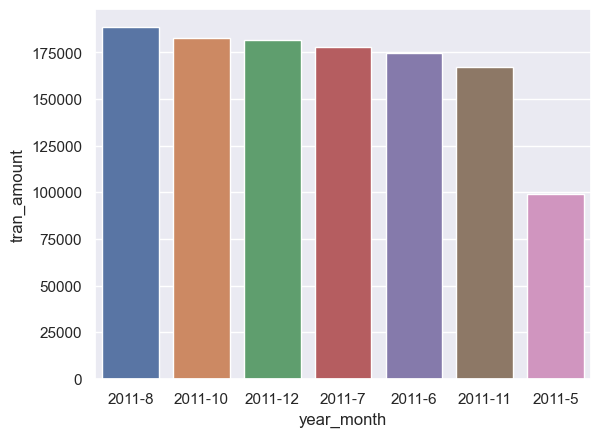

In [104]:
year_month_sales['year_month'] = year_month_sales['year'].astype(str) + '-' + year_month_sales['month'].astype(str)
y_m_sales = year_month_sales.groupby('year_month')['tran_amount'].sum()
y_m_sales=y_m_sales.head(7)
y_m_sales = y_m_sales.sort_values(ascending=False).reset_index()
sns.set(style='darkgrid')
sns.barplot(x='year_month',y='tran_amount',data=y_m_sales)
plt.show()

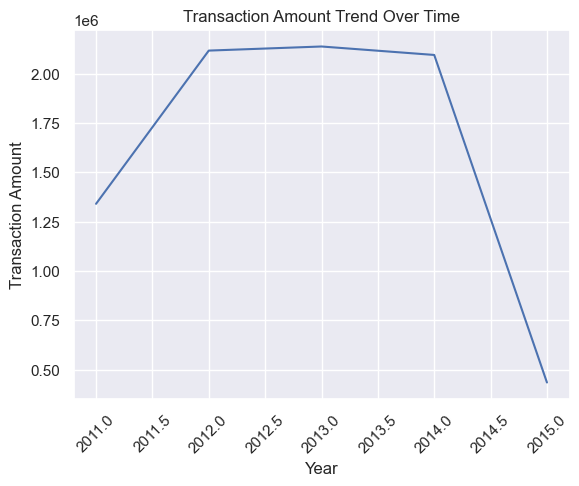

In [110]:
sns.lineplot(x='year', y='tran_amount', data=yearly_sales)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount Trend Over Time')
plt.show()

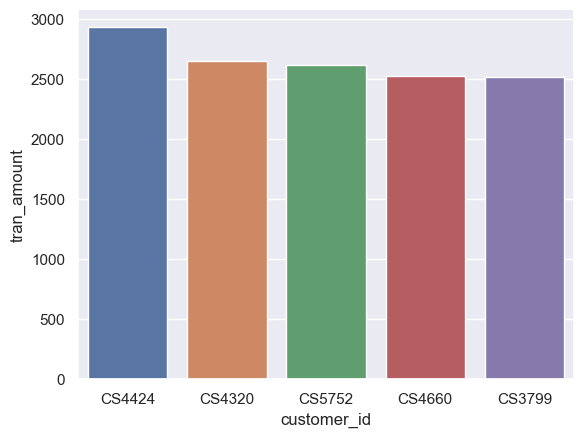

In [131]:
cust_sales = cust_sales.head(5)
sns.set(style='darkgrid')
sns.barplot(x='customer_id',y='tran_amount',data=cust_sales)
plt.show()

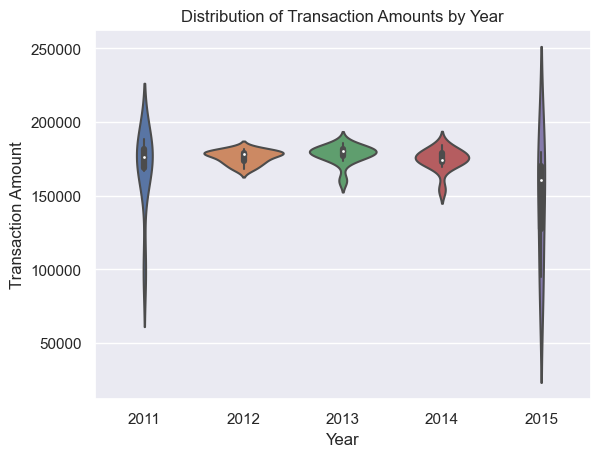

In [120]:
sns.violinplot(x='year', y='tran_amount', data=year_month_sales)
plt.xlabel('Year')
plt.ylabel('Transaction Amount')
plt.title('Distribution of Transaction Amounts by Year')
plt.show()

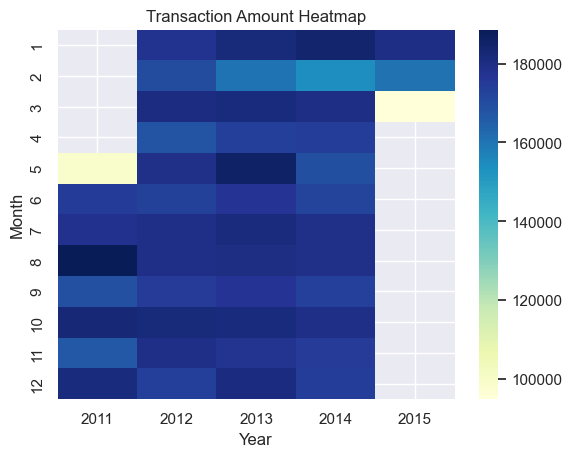

In [122]:
pivot_table = year_month_sales.pivot_table(index='month', columns='year', values='tran_amount', aggfunc='sum')
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Transaction Amount Heatmap')
plt.show()

# Advance analytics

## Time series analytics

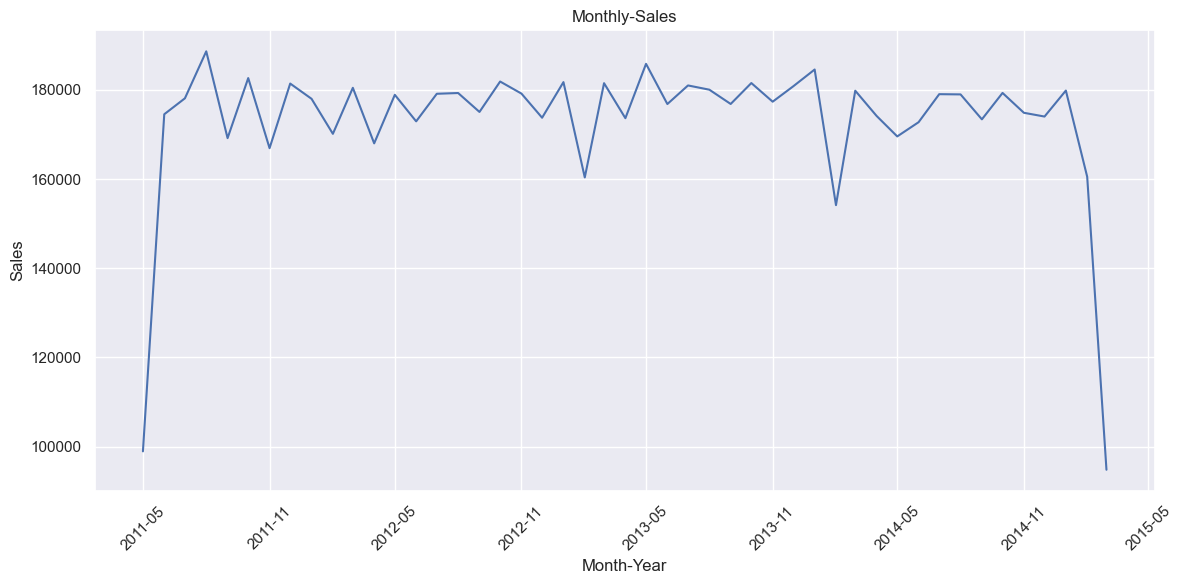

In [137]:
import matplotlib.dates as mdates
df['month_year'] = df['trans_date'].dt.to_period('M')
monthly_sales = df.groupby('month_year')['tran_amount'].sum()
monthly_sales.index  = monthly_sales.index.to_timestamp()
plt.figure(figsize = (12,6))
plt.plot(monthly_sales.index, monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly-Sales')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Cohort segmentation

In [142]:
#recency
recency = df.groupby('customer_id')['trans_date'].max()

#frequency
frequency = df.groupby('customer_id')['trans_date'].count()

#monetory
monetary = df.groupby('customer_id')['tran_amount'].sum()

#combine
rfm = pd.DataFrame({'recency':recency,'frequency':frequency,'monetary':monetary})

In [144]:
#customer segmentation

def segment_customer(row):
    if row['recency'].year > 2012 and row['frequency']>=15 and row['monetary']>1000:
        return 'P0'
    elif (2011<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<=row['monetary']<=1000):
        return 'P1'
    else:
        return 'P2'
rfm['segment']=rfm.apply(segment_customer,axis=1)

In [145]:
rfm

,recency,frequency,monetary,segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


## Churn Analysis

<Axes: xlabel='response'>

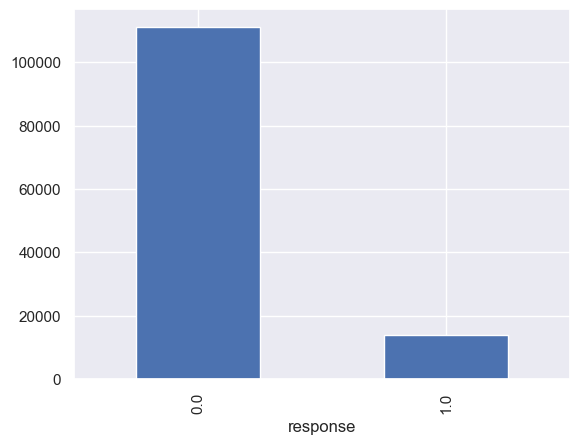

In [157]:
churn_count = df['response'].value_counts()
churn_count.plot(kind='bar')

## Analyzing customers

<Axes: xlabel='month_year'>

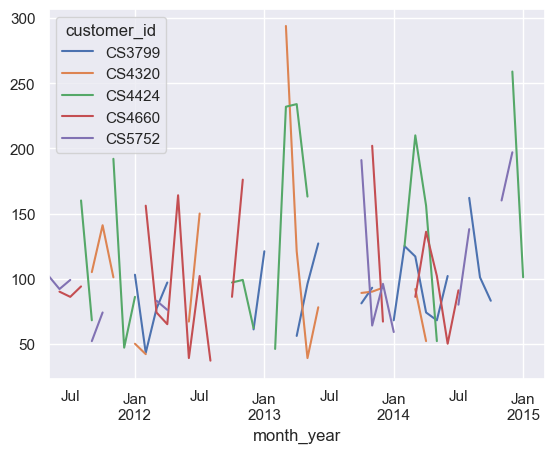

In [158]:
top5cust = monetary.sort_values(ascending=False).head(5).index
top_customers = df[df['customer_id'].isin(top5cust)]
top_customer_sales = top_customers.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')

In [159]:
df.to_csv('Main_analysis.csv')

In [161]:
rfm.to_csv('Additional_analysis.csv')